In [1]:
from scipy.integrate import *
from pandas import *
from numpy import *
from pylab import *
from scipy import *
import math

In [2]:
# time  step
dt = 0.04

# time change (discrete time)
T = 360.0 
delt = 1.0/240.0
t = np.linspace(0, T, int(T/delt)) #time array
#t = np.linspace(0,T,int(T/dt))
#print(t)

# array  to store  the  solution
N = 100
P = 1
y0 = N, P #create an array with your starting values for odeint
print(y0)

(100, 1)


In [3]:
delta = 0.01
zetas = np.linspace(0,50,10)
k = 0.04
print(len(zetas))

10


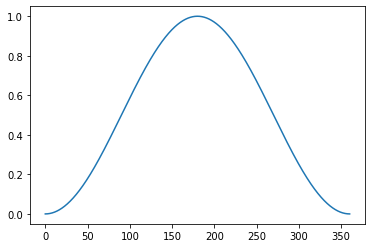

In [4]:
alpha_knots = (sin(((t)/T*2*math.pi-math.pi/2))+1)/2
#alpha_knots = ones(int(T/delt))
plt.plot(t,alpha_knots)

In [5]:
alphas = []
for alpha_knot in alpha_knots:
    alpha = alpha_knot * np.exp(-k*zetas)
    alphas.append(alpha)
light_att = array(alphas)
lights = light_att.T

print(len(t), len(zetas), shape(lights))
print(lights[0])
print(alpha)
print(shape(alpha))

86400 10 (10, 86400)
[0.00000000e+00 1.32215483e-09 5.28861926e-09 ... 5.28861926e-09
 1.32215483e-09 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10,)


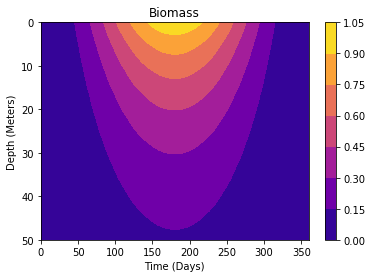

In [6]:
plt.contourf(t,zetas,lights,cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (Days)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Biomass')
plt.colorbar()

In [7]:
def nbl_model(y, t, alpha, delta):
    N,P = y[0],y[1] #puts N and P into arrays
    dNdt = -alpha*((sin(((t)/T*2*math.pi-math.pi/2))+1)/2)*N/(N+2000)*P + delta*P #equation 1
    dPdt = alpha*((sin(((t)/T*2*math.pi-math.pi/2))+1)/2)*N/(N+2000)*P - delta*P #equation 2
    return dNdt, dPdt 


In [8]:
tim = []
for alpha in alphas:
    integ_sivz = odeint(nbl_model, y0, t, args=(alpha,delta)) #odeint(model I wrote, intial values 
        #array from above, time array from intial settings, args is arguments (can have >1))
    tim.append(integ_sivz) #appended odeint into a list
sols = array(tim) #changed list into an array
print(sols)


100.0
1.0
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
*****
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
*****


RuntimeError: The array return by func must be one-dimensional, but got ndim=2.